# Autoregressive Model
- Before I place model in [main.ipynb](https://github.com/Brinkley97/applied_time_series_and_machine_learning/blob/main/play/main.ipynb)

# Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg

# test for stationarity
from statsmodels.tsa.stattools import adfuller

# partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

import statsmodels.graphics.tsaplots as tsa

In [2]:
ticker_symbol = "VOO"
# symbol = "BRK-A"
start_date = "2022-01-01"
end_date = "2023-07-26"
voo_df = yf.download(ticker_symbol, start=start_date, end=end_date)
voo_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,437.929993,439.269989,435.640015,439.250000,428.554688,6017300
2022-01-04,440.579987,441.260010,437.220001,439.070007,428.379028,6262200
2022-01-05,438.779999,439.410004,430.529999,430.660004,420.173767,7539600
2022-01-06,430.200012,432.829987,427.899994,430.079987,419.607910,7971500
2022-01-07,430.209991,431.359985,427.200012,428.589996,418.154236,6157500
...,...,...,...,...,...,...
2023-06-30,405.399994,408.220001,405.290009,407.279999,407.279999,5160100
2023-07-03,406.920013,408.059998,406.679993,408.059998,408.059998,2372000
2023-07-05,406.010010,407.839996,406.010010,407.149994,407.149994,4230100


In [3]:
open_voo_df = voo_df['Open']
open_voo_df

Date
2022-01-03    437.929993
2022-01-04    440.579987
2022-01-05    438.779999
2022-01-06    430.200012
2022-01-07    430.209991
                 ...    
2023-06-30    405.399994
2023-07-03    406.920013
2023-07-05    406.010010
2023-07-06    403.779999
2023-07-07    403.029999
Name: Open, Length: 379, dtype: float64

<AxesSubplot: xlabel='Date'>

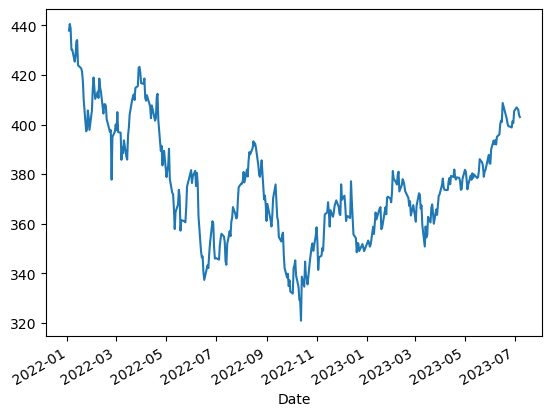

In [4]:
open_voo_df.plot()

# Check Stationarity
- [ ] Don't quite understand the `pvalue` from the Augmented Dickey-Fuller unit root test.

In [5]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(open_voo_df, autolag='AIC')
adf, pvalue, usedlag, nobs, critical_values, icbest

(-2.8233222750606606,
 0.055018798563588975,
 0,
 378,
 {'1%': -3.4477686860685, '5%': -2.869216670067509, '10%': -2.570859500573892},
 2193.970478393932)

# Plot Partial Autocorrelation
- ACor states at lag k, how much spread is there between the 1st observation and my kth observation.
- Here, there seems to be low ACor.
- [ ] What to do with this? 
- [ ] Does this mean our model prediction(s) will be off?

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


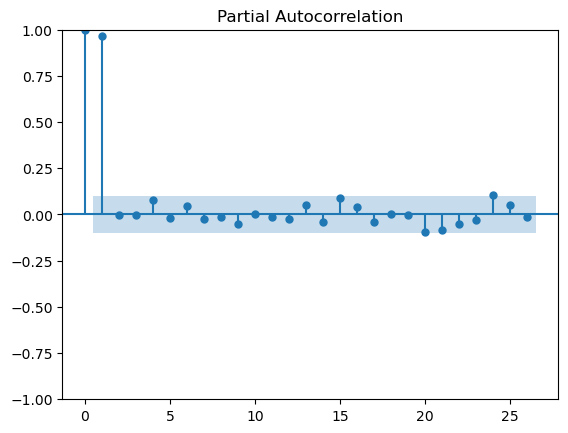

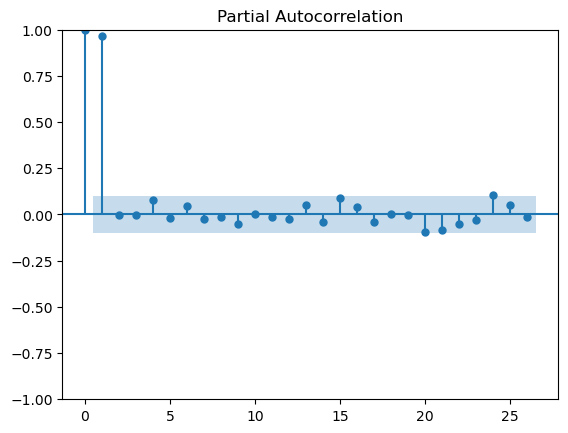

In [6]:
plot_pacf(open_voo_df)

# Split Data

In [7]:
N = len(open_voo_df)
N

379

In [8]:
split_data_at_length = N - 100
split_data_at_length

279

In [9]:
train_data = open_voo_df[0:split_data_at_length]
train_data

Date
2022-01-03    437.929993
2022-01-04    440.579987
2022-01-05    438.779999
2022-01-06    430.200012
2022-01-07    430.209991
                 ...    
2023-02-06    376.579987
2023-02-07    375.790009
2023-02-08    379.690002
2023-02-09    380.970001
2023-02-10    373.000000
Name: Open, Length: 279, dtype: float64

In [10]:
test_data = open_voo_df[split_data_at_length:]
test_data

Date
2023-02-13    375.649994
2023-02-14    377.959991
2023-02-15    377.149994
2023-02-16    375.660004
2023-02-17    373.179993
                 ...    
2023-06-30    405.399994
2023-07-03    406.920013
2023-07-05    406.010010
2023-07-06    403.779999
2023-07-07    403.029999
Name: Open, Length: 100, dtype: float64

# Create AR Model
- [ ] How to determine the proper lag value? 
    - Look at the Partial ACor plot. Being that no correlation exists after 2, we'll stop at 2 (where there still exists some correlation)
- [ ] How to understand the model summary?

In [11]:
ar_model = AutoReg(train_data, lags=2)
ar_model

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
train_ar_model = ar_model.fit()
train_ar_model

In [13]:
train_ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Open   No. Observations:                  279
Model:                     AutoReg(2)   Log Likelihood                -865.476
Method:               Conditional MLE   S.D. of innovations              5.504
Date:                Fri, 07 Jul 2023   AIC                           1738.952
Time:                        17:44:28   BIC                           1753.448
Sample:                             2   HQIC                          1744.768
                                  279                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0640      4.870      2.683      0.007       3.520      22.608
Open.L1        0.9430      0.060     15.669      0.000       0.825       1.061
Open.L2        0.0215      0.060      0.362      0.718      -0.095       0.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0360           +0.0000j            1.0360            0.0000
AR.2          -44.8435           +0.0000j           44.8435            0.5000
-----------------------------------------------------------------------------
"""

# Make predictions
- Start making predictions at the split observation and go to the n-1 observation. A simplier example is with [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Say we split at 7. historical_data would start at 7. We will make predictions for 8, 9. What about 10?

In [14]:
historical_data = len(train_data)
historical_data

279

In [15]:
tomorrow = len(open_voo_df) - 1
tomorrow

378

In [ ]:
pred = train_ar_model.predict(start=historical_data, end=tomorrow, dynamic=False)
pred

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


279    372.989315
280    372.807685
281    372.636184
282    372.470556
283    372.310683
          ...    
374    368.046270
375    368.040088
376    368.034121
377    368.028361
378    368.022801
Length: 100, dtype: float64

- [ ] Why is our plot as such?

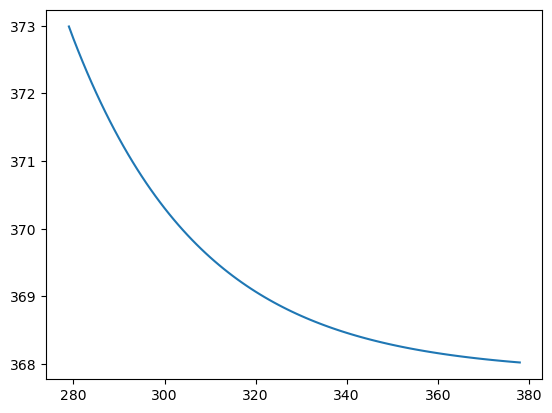

In [24]:
pyplot.plot(pred)

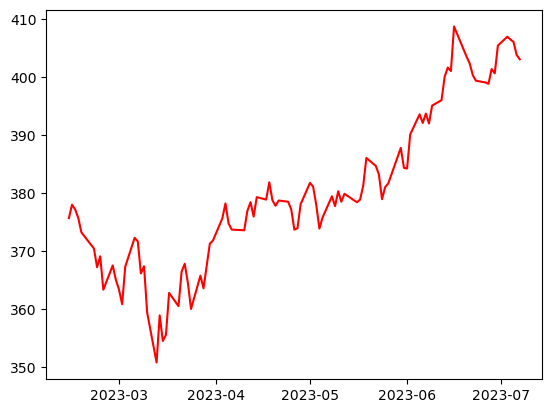

In [25]:
pyplot.plot(test_data, color='red')